In [1]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
plt.style.use('seaborn-whitegrid')

### 0. Station url from [UNAVO webservices](https://www.unavco.org/data/web-services/documentation/documentation.html#!/GNSS47GPS/getPositionByStationId)

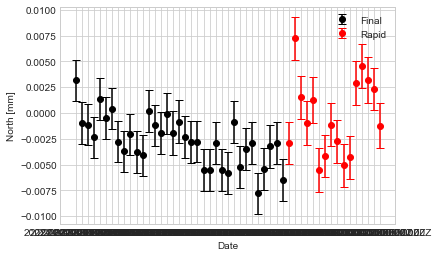

In [10]:
#creating url variable for each station

#Stats=('BNZA','BYAH', 'KANZ', 'NYBA', 'RUBO', 'IWAW', 'KMBR')
Stats=('BNZA',)

for stat in Stats:
    URL='https://web-services.unavco.org/gps/data/position/'+stat+'/v3?analysisCenter=cwu&referenceFrame=nam14&starttime=&endtime=&report=long&dataPostProcessing=Uncleaned&refCoordOption=from_analysis_center'
    #creating pandas readable csv from the url
    req = requests.get(URL) # get data
    url_content = req.content
    file=stat+'.csv'
    csv_file = open(file, 'wb')
    csv_file.write(url_content)
    csv_file.close()
    
    df = pd.read_csv(file, header=8)
    
    dfFinal=df.loc[df[' Solution']=='final']
    dfRapid=df.loc[df[' Solution']=='rapid']

    plt.errorbar(x=dfFinal['Datetime'], y=dfFinal[' delta N'], yerr= dfFinal[' Std Dev N'], fmt='o', capsize=4, label='Final', color='black')
    plt.errorbar(x=dfRapid['Datetime'], y=dfRapid[' delta N'], yerr= dfRapid[' Std Dev N'], fmt='o', capsize=4, label='Rapid', color='red')
    plt.xlabel("Date")
    plt.ylabel('North [mm]')
    plt.grid(True)
    plt.legend()
    plt.show()

#dfFinal.head()
   

In [5]:
df.keys()

Index(['Datetime', ' X', ' Y', ' Z', ' Std Dev X', ' Std Dev Y', ' Std Dev Z',
       ' Corr XY', ' Corr XZ', ' Corr YZ', ' N latitude', ' E longitude',
       ' Height', ' delta N', ' delta E', ' delta U', ' Std Dev N',
       ' Std Dev E', ' Std Dev U', ' Corr NE', ' Corr NU', ' Corr EU',
       ' Solution'],
      dtype='object')

### 1. Plotting ALL solutions

In [18]:
#creating pandas readable csv from the url
req = requests.get(BNZA_url)
url_content = req.content
csv_file = open('BNZA.csv', 'wb')

csv_file.write(url_content)
csv_file.close()
BNZA_data = pd.read_csv('BNZA.csv', header=8)
BNZA_data.head()

#manipulating the dataframe Datetime key to Year, month, day 

BNZA_data['Date'] =  pd.to_datetime(BNZA_data['Datetime'])
BNZA_data["year"] = BNZA_data["Date"].dt.year
BNZA_data["month"] = BNZA_data["Date"].dt.month
BNZA_data["day"] = BNZA_data["Date"].dt.day
BNZA_data["dayofyear"] = BNZA_data["Date"].dt.strftime("%j")

#print(BNZA_data.dayofyear)
#print(BNZA_data[' delta N'])
#print(BNZA_data["Date"])
#type(BNZA_data[' delta N'][0])


<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [31]:
url_content

b'# dataset: GeoCSV 2.0\n# field_unit: ISO 8601 datetime UTC, meters, meters, meters, meters, meters, meters, number, number, number, degrees north, degrees east, meters, meters, meters, meters, meters, meters, meters, number, number, number, UTF-8\n# field_type: string, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, string\n# attribution: http://www.unavco.org/community/policies_forms/attribution/attribution.html\n# Request URI: http://ws-prod1.int.unavco.org:9030/gps/data/position/BNZA/v3?analysisCenter=cwu&referenceFrame=nam14&starttime=&endtime=&report=long&dataPostProcessing=Uncleaned&refCoordOption=from_analysis_center\n# Source File: BNZA.cwu.nam14.pos Date Modified: 2022-09-27 23:26:17\n# XYZ Reference Coordinate(nam14): X:  5560783.86623 Y:  3120220.77864 Z:  -209865.88661\n# Applied Offset: X: 0 Y: 0 Z: 0\nDatetime, X, Y, Z, Std Dev X, Std Dev Y, Std Dev Z, Corr XY, Corr XZ, Co

In [28]:
plt.errorbar(BNZA_data.dayofyear,y=BNZA_data[' delta N'], yerr= BNZA_data[' Std Dev N'], fmt='.', capsize=4)
plt.plot(BNZA_data["Date"],BNZA_data[' delta N'],'r.')


TypeError: errorbar() got multiple values for argument 'yerr'

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

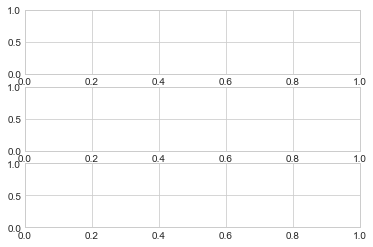

In [3]:
#creating pandas readable csv from the url
req = requests.get(BNZA_url)
url_content = req.content
csv_file = open('BNZA.csv', 'wb')

csv_file.write(url_content)
csv_file.close()
BNZA_data = pd.read_csv('BNZA.csv', header=8)
BNZA_data.head()

#manipulating the dataframe Datetime key to Year, month, day 

BNZA_data['Date'] =  pd.to_datetime(BNZA_data['Datetime'])
BNZA_data["year"] = BNZA_data["Date"].dt.year
BNZA_data["month"] = BNZA_data["Date"].dt.month
BNZA_data["day"] = BNZA_data["Date"].dt.day
BNZA_data["dayofyear"] = BNZA_data["Date"].dt.strftime("%j")


fig, axes = plt.subplots(3, 1)

#create boxplot in each subplot
#sns.boxplot(data=df, x='team', y='points', ax=axes[1,0])
#plotting all BNZA solutions
#plt.figure(1, (20,3))
sns.pointplot(x=BNZA_data.dayofyear, y=BNZA_data[' delta N'],hue=BNZA_data[' Solution'], capsize=.4, join=False, legend=True, ax=axes[0,0])
plt.errorbar(x=BNZA_data.dayofyear, y=BNZA_data[' delta N'], yerr= BNZA_data[' Std Dev N'], fmt='.', capsize=4)
plt.title("BNZA [North]")
plt.xlabel("Day of Year [2022]")
plt.ylabel('Displacement [mm]')
plt.grid(True)


#plt.figure(2, (20,3))
sns.pointplot(x=BNZA_data.dayofyear, y=BNZA_data[' delta E'],hue=BNZA_data[' Solution'], capsize=.4, join=False, legend=False, ax=axes[1,0])
plt.errorbar(x=BNZA_data.dayofyear,y=BNZA_data[' delta E'], yerr= BNZA_data[' Std Dev E'], fmt='.', capsize=4 )
plt.title("BNZA [East]")
plt.xlabel("Day of Year [2022]")
plt.ylabel('Displacement [mm]')
plt.grid(True)

#plt.figure(3, (20,3))
sns.pointplot(x=BNZA_data.dayofyear, y=BNZA_data[' delta U'],hue=BNZA_data[' Solution'], errorbar=(BNZA_data[' Std Dev U'],100), capsize=.4, join=False, legend=False, ax=axes[2,0])
plt.errorbar(x=BNZA_data.dayofyear,y=BNZA_data[' delta U'], yerr= BNZA_data[' Std Dev U'], fmt='.', capsize=4 )
plt.title("BNZA [Vertical]")
plt.xlabel("Day of Year [2022]")
plt.ylabel('Displacement [mm]')
plt.grid(True)
